Basic model with inputs County, State, and Year that can predict Max AQI:

Set up the dataset, features, and predictor:

In [10]:
import pandas as pd

dataset = pd.read_csv('./Datasets/all_years_aqi_by_county.csv')
dataset["CountyState"] = dataset["County"] + ", " + dataset["State"]

# Inputs to predict a given value
features = ["CountyState", "Year"]

# Value to be predicted
predictor = "Max AQI"

Split the dataset, encode the text features, fit the model, and return model error:

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Split the dataset into features and predictors
features_df = pd.DataFrame(dataset[features])
predictor_df = pd.DataFrame(dataset[predictor])

# Encode County, State labels
le = LabelEncoder()
features_df["CountyState"] = le.fit_transform(features_df["CountyState"])

# Make the train test split
train_ft, test_ft, train_pr, test_pr = train_test_split(features_df, predictor_df, test_size=.2)

# Fit a basic Linear Regression and check RMSE
regression = LinearRegression().fit(train_ft, train_pr)
print(root_mean_squared_error(test_pr, regression.predict(test_ft)))

212.33314472618207


Example model prediction of King County Washington Max AQI for 2027:

In [12]:
# Input values to the model, example prediction
predict_countystate = le.transform(["King, Washington"])[0]
predict_year = 2027

predict_data = {
    'CountyState': [predict_countystate],
    'Year': [predict_year]
}
predict_data_df = pd.DataFrame(predict_data)

# Predicted value (Max AQI)
regression.predict(predict_data_df)

array([[121.11002339]])

Graphing predicted Max AQI against actual Max AQI in the test dataset:

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

test_pr = pd.DataFrame(test_pr)
predictions = pd.DataFrame(regression.predict(test_ft))

test_pr.reset_index(inplace = True, drop=True)
test_pr.reset_index(inplace = True)
predictions.reset_index(inplace = True)

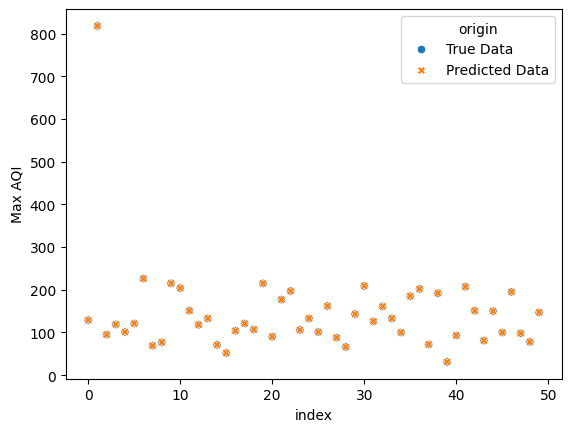

In [14]:
plot_data = pd.concat([test_pr.assign(origin = 'True Data').head(50), predictions.assign(origin="Predicted Data").head(50)])

sns.scatterplot(data=plot_data, y=predictor, x='index', hue='origin', style="origin")
plt.show()